In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from scipy.stats import norm

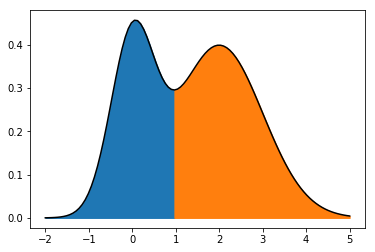

In [14]:
def figure_1d_pdf():
    x = np.linspace(-2, 5, 100)

    def f(x):
        a = norm(0, 0.5)
        b = norm(2, 1)
        return 0.5 * a.pdf(x) + b.pdf(x)
    
    valley = 0.96
    
    fig, ax = plt.subplots()
    ax.plot(x, f(x), color='k')
    ax.fill_between(x, f(x), where=(x <= valley + 1e-2), color='C0')
    ax.fill_between(x, f(x), where=(x >= valley), color='C1')
    plt.show()

figure_1d_pdf()

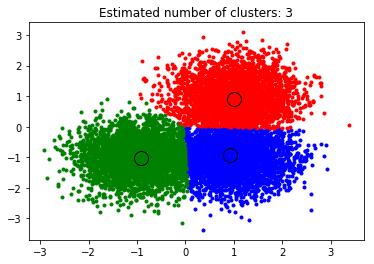

In [15]:
def figure_sklearn_demo():
    import numpy as np
    from sklearn.cluster import MeanShift, estimate_bandwidth
    from sklearn.datasets.samples_generator import make_blobs

    
    centers = [[1, 1], [-1, -1], [1, -1]]
    X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

    bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)

    # Plot result
    import matplotlib.pyplot as plt
    from itertools import cycle

    plt.figure(1)
    plt.clf()

    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clusters_), colors):
        my_members = labels == k
        cluster_center = cluster_centers[k]
        plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
        plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=14)
    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()

figure_sklearn_demo()

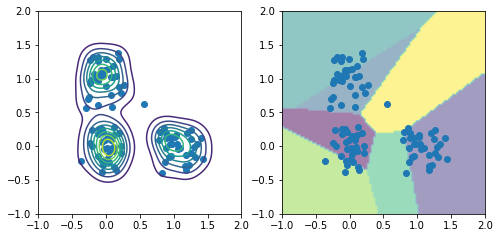

In [101]:
def figure_2d_sample():
    import numpy as np
    from sklearn.cluster import MeanShift, estimate_bandwidth
    from sklearn.datasets.samples_generator import make_blobs
    from sklearn.neighbors import KernelDensity
    from itertools import product
    
    centers = [[0, 0], [0, 1], [1, 0]]
    X_train, _ = make_blobs(n_samples=100, centers=centers, cluster_std=0.2)
    
    #bandwidth = estimate_bandwidth(X_train, n_samples=500)
    #print(bandwidth)
    kd = KernelDensity(0.15)
    kd.fit(X_train)
    
    ms = MeanShift(0.25)
    ms.fit(X_train)
    
    x = np.linspace(-1., 2., 100)
    y = np.linspace(-1., 2., 100)
    X_test = np.array(list(product(x, y)))
    
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T
    Z = np.exp(kd.score_samples(XX))
    Z = Z.reshape(X.shape)
    
    
    fig, axes = plt.subplots(ncols=2, figsize=(8, 4))
    axes[0].contour(X, Y, Z, levels=np.linspace(Z.min(), Z.max(), 10))
    # ax.plot(X_test[:, 0], X_test[:, 1], '.')
    axes[0].scatter(X_train[:,0], X_train[:,1])
    axes[0].set_aspect('equal')
    
    
    
    Z = ms.predict(X_test).reshape(X.shape)
    axes[1].imshow(Z, extent=(-1,2,-1,2), origin='lower', interpolation='bilinear', alpha=0.5)
    axes[1].scatter(X_train[:,0], X_train[:,1])
    
    plt.show()

    

figure_2d_sample()

In [107]:
d = 5
n = 5000

h_star = (4 / ((d+2)*n))**(1/(d+4))
h_star

0.36475319542102336

2.271344412170275


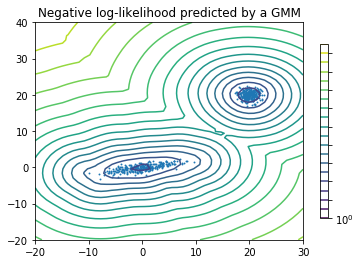

In [75]:
def figure_kde_density_estimation():
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.colors import LogNorm
    from sklearn import mixture
    from sklearn.neighbors import KernelDensity
    from sklearn.cluster import estimate_bandwidth

    n_samples = 300

    # generate random sample, two components
    np.random.seed(0)

    # generate spherical data centered on (20, 20)
    shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])

    # generate zero centered stretched Gaussian data
    C = np.array([[0., -0.7], [3.5, .7]])
    stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

    # concatenate the two datasets into the final training set
    X_train = np.vstack([shifted_gaussian, stretched_gaussian])

    # fit a Gaussian Mixture Model with two components
    clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
    
    bandwidth = estimate_bandwidth(X_train, quantile=0.2) # , n_samples=500)
    clf = KernelDensity(bandwidth / 2)
    print(bandwidth)
    
    clf.fit(X_train)

    # display predicted scores by the model as a contour plot
    x = np.linspace(-20., 30.)
    y = np.linspace(-20., 40.)
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T
    Z = -clf.score_samples(XX)
    Z = Z.reshape(X.shape)

    CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1e-0, vmax=1e3),
                     levels=np.logspace(0, 3, 20))
    CB = plt.colorbar(CS, shrink=0.8, extend='both')
    plt.scatter(X_train[:, 0], X_train[:, 1], .8)

    plt.title('Negative log-likelihood predicted by a GMM')
    plt.axis('tight')
    plt.show()

figure_kde_density_estimation()